In [ ]:
from google.colab import files
upload = files.upload()

Saving cars.csv to cars.csv


      Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0   Tata Nexon  2012          12.04          20.02      199357    Diesel   
1  Honda Amaze  2005          19.78          24.32      187884    Petrol   
2  Honda Amaze  2020           4.30           7.20       85168    Petrol   
3    Kia Sonet  2018          11.92          19.73      175441       CNG   
4   Tata Punch  2005           4.73           7.60       38178    Petrol   

  Seller_Type Transmission  
0      Dealer    Automatic  
1  Individual    Automatic  
2  Individual       Manual  
3  Individual    Automatic  
4  Individual       Manual  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       400 non-null    object 
 1   Year           400 non-null    int64  
 2   Selling_Price  400 non-null    float64
 3   Present_Price  400 non-null    float64
 

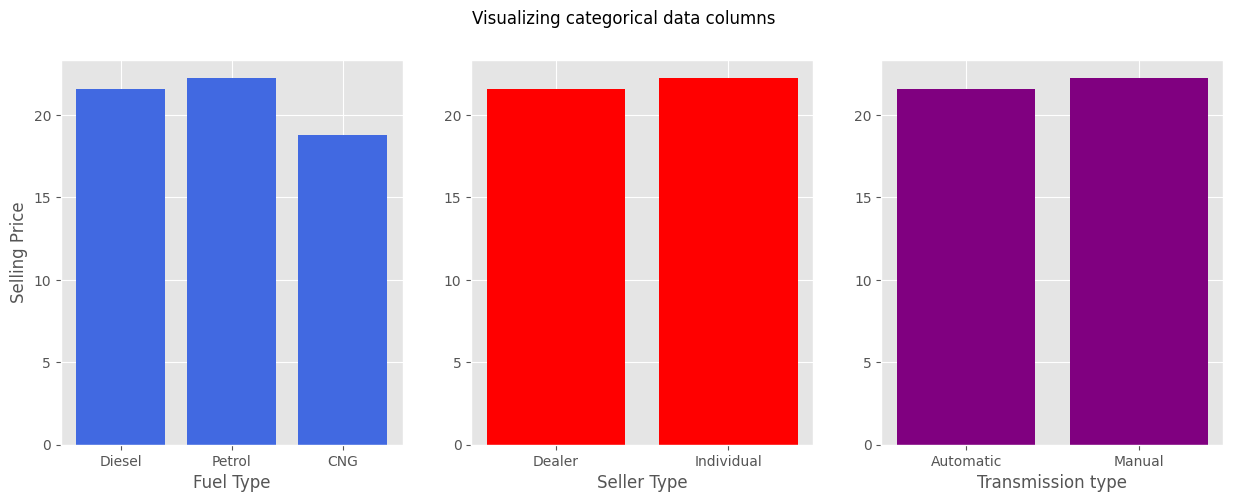

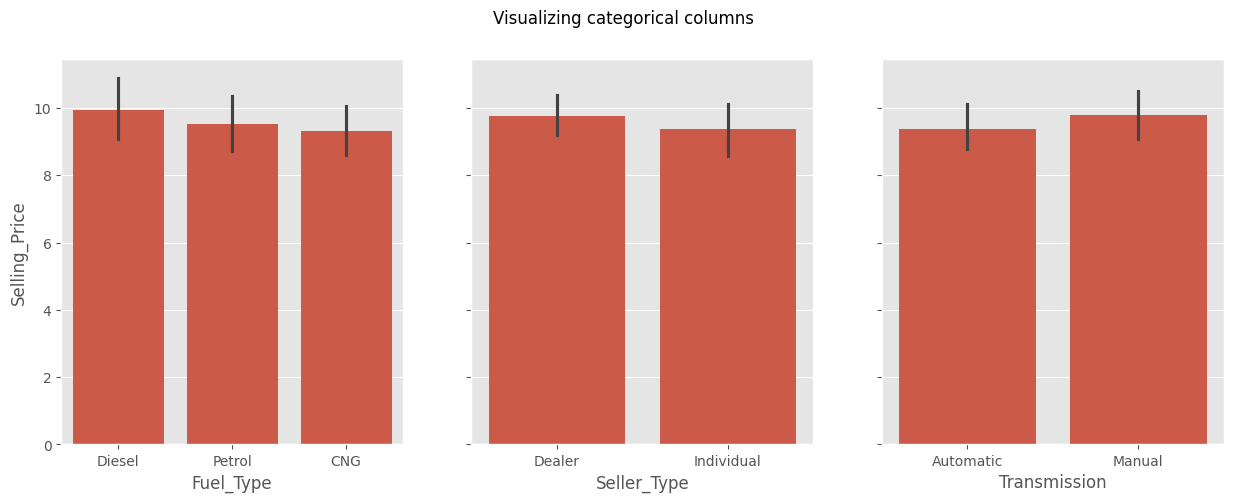

<ipython-input-21-1484070472>:60: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)


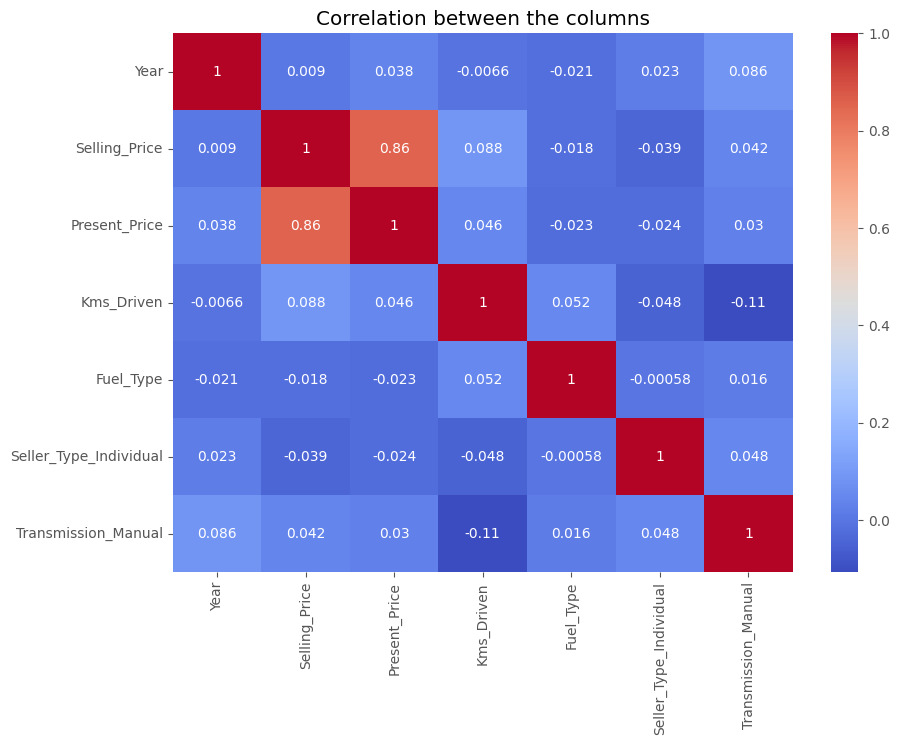

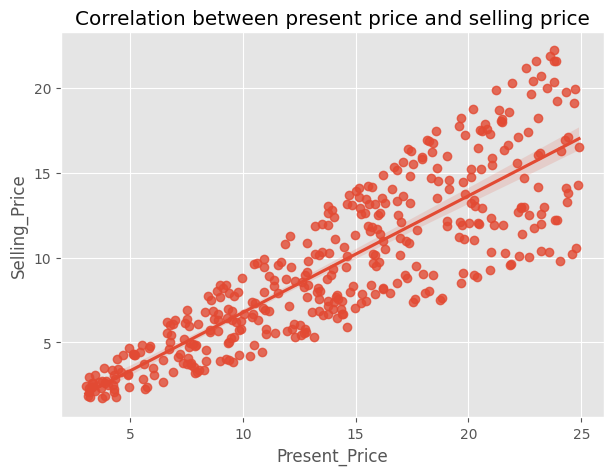

Shape of X is:  (400, 6)
Shape of y is:  (400,)
X_test shape: (120, 6)
X_train shape: (280, 6)
y_test shape:  (120,)
y_train shape: (280,)
MAE:  2.049083887124004
MSE:  6.338375052224048
R2 score:  0.7209317261138805


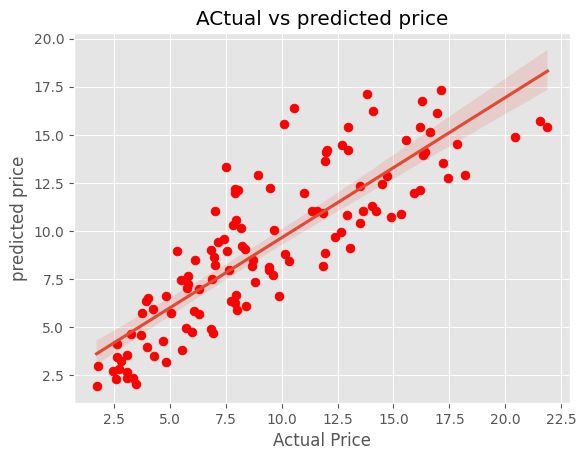

['ss.pkl']

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

cars_data = pd.read_csv("cars.csv")
print(cars_data.head())
cars_data.info()
cars_data.isnull().sum()
cars_data.describe()
cars_data.columns

print(cars_data["Fuel_Type"].value_counts())
print(cars_data["Seller_Type"].value_counts())
print(cars_data["Transmission"].value_counts())


fuel_type = cars_data["Fuel_Type"]
seller_type = cars_data["Seller_Type"]
transmission_type = cars_data["Transmission"]
selling_price = cars_data["Selling_Price"]


from matplotlib import style
style.use("ggplot")
fig = plt.figure(figsize=(15,5))
plt.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])
plt.show()

petrol_data = cars_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()


seller_data = cars_data.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()



cars_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
cars_data = pd.get_dummies(cars_data, columns=['Seller_Type', 'Transmission'], drop_first=True)
cars_data.head()


plt.figure(figsize=(10,7))
sns.heatmap(cars_data.drop(['Car_Name'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between the columns')
plt.show()


fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=cars_data)
plt.show()



X = cars_data.drop(['Car_Name','Selling_Price'], axis=1)
y = cars_data['Selling_Price']

print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)



print("MAE: ", (metrics.mean_absolute_error( y_test, prediction)))
print("MSE: ", (metrics.mean_squared_error( y_test , prediction)))
print("R2 score: ", (metrics.r2_score( y_test, prediction)))



sns.regplot(x=y_test, y=prediction)
plt.scatter(y_test, prediction, color='red')
plt.xlabel("Actual Price")
plt.ylabel('predicted price')
plt.title("ACtual vs predicted price")
plt.show()


import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(ss, 'ss.pkl')



